## Introduction

**By:** Ben  
**Dataset:** Heart Disease Dataset (Kaggle)

**Objective:**  
To analyze patient health indicators and predict the likelihood of heart disease using data-driven classification techniques.

**Overview:**  
Heart disease remains one of the leading causes of death globally. Early detection through non-invasive medical data can significantly improve prevention and treatment outcomes.  
This project explores patient data containing features such as age, cholesterol level, resting blood pressure, maximum heart rate, and chest pain type.  
Through Exploratory Data Analysis (EDA), the project identifies key factors influencing heart disease and develops a machine learning model capable of predicting heart disease risk.

**Goal:**  
To build an accurate predictive model that assists healthcare professionals in identifying high-risk individuals and supports timely medical intervention.


In [89]:
# -------------------------------------------------------------
# Importing Required Libraries
# -------------------------------------------------------------
# Data handling and numerical computation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical functions
from scipy.stats import skew, kurtosis
import scipy.stats as stats

# Machine learning preprocessing and evaluation tools
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,roc_auc_score

# Advanced gradient boosting models
import lightgbm as LGB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import pickle
# Configuration and general settings
import warnings
warnings.filterwarnings("ignore")
sns.set()


### Data Import
The dataset is loaded from the local directory using `pandas.read_csv()`.  
It contains patient health records with attributes such as age, sex, cholesterol level, resting blood pressure, chest pain type, and maximum heart rate.  
These features are used for exploratory data analysis (EDA) and to develop a predictive model for detecting heart disease.


In [90]:
# Load the Heart Disease dataset from the specified local directory using pandas
data = pd.read_csv(r"C:\Users\AKANBI BENJAMIN\Documents\heart.csv")


## Exploring the Data  

Before analysis, it is important to understand the structure and characteristics of the dataset.  
We will:  
- Preview sample records using `.head()` to confirm columns and values.  
- Use `.info()` to inspect column datatypes, non-null counts, and memory usage.  
- Check for missing values with `.isna().sum()` to identify potential data cleaning needs.  
- Check for duplicate records using `.duplicated().sum()` and remove them if found.  
- Inspect dataset dimensions using `.shape`.  
- Generate summary statistics for numerical columns with `.describe()`.  
- Count unique values per column using `.nunique()`.  

After confirming dataset integrity, we proceed to explore key distributions:  
- **Target Variable (`target`)**: Understanding the number of patients diagnosed with and without heart disease.  
- **Sex (`sex`)**: Examining how gender relates to heart disease occurrence.  
- **Chest Pain Type (`cp`)**: Exploring how different chest pain types correlate with disease presence.  
- **Number of Major Vessels (`ca`)**: Observing how the number of affected vessels relates to heart disease.  


In [91]:
# Preview the first 5 rows of the dataset to confirm column names and sample values
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [92]:
# Display information about the dataset — data types, non-null counts, and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [93]:
# Generate summary statistics (mean, median, std, etc.) for all numerical columns
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [94]:
# Display the number of rows and columns in the dataset (rows, columns)
data.shape

(1025, 14)

In [95]:
# Check for missing values in each column to identify potential data cleaning needs
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [96]:
# Check for duplicate rows in the dataset
data.duplicated().sum()

723

In [97]:
### Duplicate Check and Removal
# Identify duplicated rows in the dataset
duplicates = data[data.duplicated()]
duplicates.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1


In [98]:
# Drop duplicate records from the dataset
data = data.drop_duplicates()

# Confirm that no duplicates remain
data.duplicated().sum()

0

In [99]:
# Count the number of unique values in each column to understand data variability
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [100]:
### Checking Column Names
# Display all column names in the dataset
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [101]:
### Target Variable Distribution
# Count the number of instances for each target class (0 = No Heart Disease, 1 = Heart Disease)
target_counts = data["target"].value_counts()

# Display the class distribution
target_counts

target
1    164
0    138
Name: count, dtype: int64

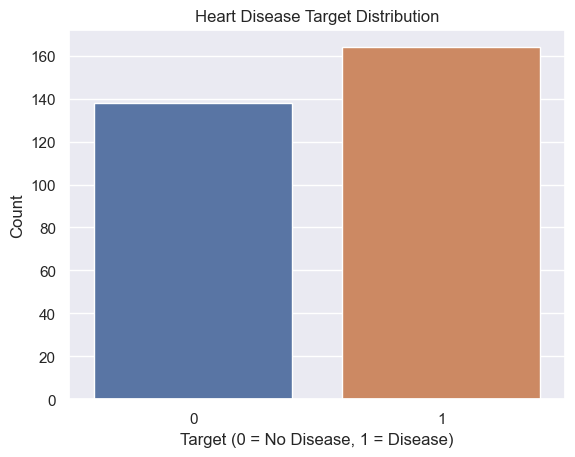

In [102]:
# Visualize the target class distribution
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("Heart Disease Target Distribution")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()

In [103]:
### Heart Disease by Sex
# Calculate the number of heart disease cases grouped by gender
Sex_heart_disease_dist = data.groupby("sex")["target"].sum()

# Display distribution by sex
Sex_heart_disease_dist


sex
0    72
1    92
Name: target, dtype: int64

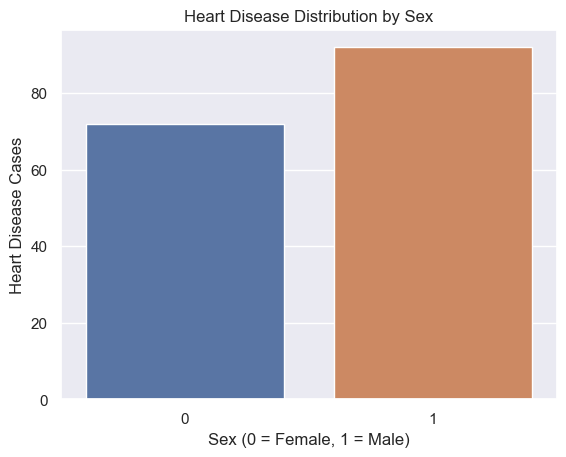

In [104]:
# Visualize heart disease cases by sex
sns.barplot(x=Sex_heart_disease_dist.index, y=Sex_heart_disease_dist.values)
plt.title("Heart Disease Distribution by Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Heart Disease Cases")
plt.show()

In [105]:
### Heart Disease by Chest Pain Type
# Calculate total heart disease cases for each chest pain type
cp_heart_disease_dist = data.groupby("cp")["target"].sum()

# Display distribution
cp_heart_disease_dist


cp
0    39
1    41
2    68
3    16
Name: target, dtype: int64

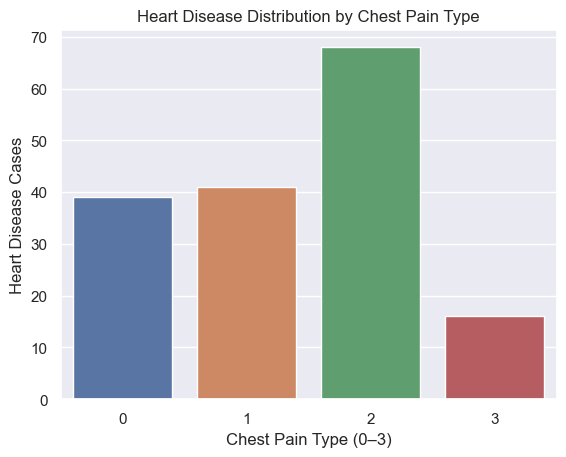

In [106]:
# Visualize heart disease cases by chest pain type
sns.barplot(x=cp_heart_disease_dist.index, y=cp_heart_disease_dist.values)
plt.title("Heart Disease Distribution by Chest Pain Type")
plt.xlabel("Chest Pain Type (0–3)")
plt.ylabel("Heart Disease Cases")
plt.show()

In [107]:
### Heart Disease by Number of Major Vessels (CA)
# Calculate total heart disease cases for each value of 'ca'
ca_heart_disease_dist = data.groupby("ca")["target"].sum()

# Display distribution
ca_heart_disease_dist


ca
0    130
1     21
2      7
3      3
4      3
Name: target, dtype: int64

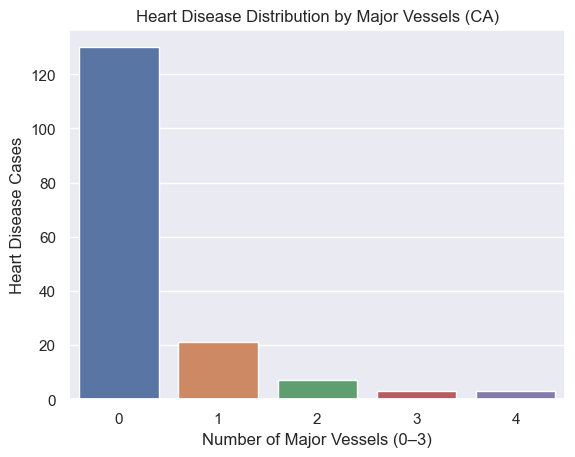

In [108]:
# Visualize heart disease cases by number of major vessels
sns.barplot(x=ca_heart_disease_dist.index, y=ca_heart_disease_dist.values)
plt.title("Heart Disease Distribution by Major Vessels (CA)")
plt.xlabel("Number of Major Vessels (0–3)")
plt.ylabel("Heart Disease Cases")
plt.show()

###  Exploring the Data  - Conclusion

The heart disease dataset was successfully loaded and examined.  
No missing values or duplicate records were found after cleaning, confirming good data quality.  

The dataset contains balanced classes of patients with and without heart disease, ensuring fair model training.  

Exploration of key variables revealed meaningful insights:  
- **Sex:** Males show a higher number of heart disease cases than females, suggesting gender-related vulnerability.  
- **Chest Pain Type:** Patients with chest pain type 2 recorded the highest frequency of heart disease, indicating a strong relationship between chest pain characteristics and disease risk.  
- **Number of Major Vessels (ca):** Most heart disease cases occurred in patients with zero major vessels open, showing that the fewer the open vessels, the higher the likelihood of heart disease.  

Overall, the data is clean, balanced, and shows medically logical patterns.  
These findings provide a strong foundation for deeper statistical analysis and model building in the next phase.


## Features Consistency Check and Correction
### Consistency Verification
To ensure data reliability before modeling, a consistency validation was performed on both numerical and categorical features.  
The goal was to detect unrealistic or out-of-range values that might indicate recording errors or data corruption.  

### Key Checks Performed:
- **Numeric Features:**  
  - Verified that all values of `age`, `trestbps` (resting blood pressure), `chol` (cholesterol), `thalach` (maximum heart rate), and `oldpeak` fall within medically valid ranges.  
- **Categorical Features:**  
  - Ensured logical value ranges for discrete features such as `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`, and `target`.  

In [109]:
#  Consistency Check for Heart Disease Dataset

#  Initialize dictionary to store inconsistent rows
inconsistent = {}

#  Numeric feature range checks
inconsistent["age"] = data[(data["age"] < 20) | (data["age"] > 100)]
inconsistent["trestbps"] = data[(data["trestbps"] < 70) | (data["trestbps"] > 250)]
inconsistent["chol"] = data[(data["chol"] < 100) | (data["chol"] > 600)]
inconsistent["thalach"] = data[(data["thalach"] < 50) | (data["thalach"] > 230)]
inconsistent["oldpeak"] = data[data["oldpeak"] < 0]

#  Categorical feature logical range checks
inconsistent["sex"] = data[(data["sex"] < 0) | (data["sex"] > 1)]
inconsistent["cp"] = data[(data["cp"] < 0) | (data["cp"] > 3)]
inconsistent["fbs"] = data[(data["fbs"] < 0) | (data["fbs"] > 1)]
inconsistent["restecg"] = data[(data["restecg"] < 0) | (data["restecg"] > 2)]
inconsistent["exang"] = data[(data["exang"] < 0) | (data["exang"] > 1)]
inconsistent["slope"] = data[(data["slope"] < 0) | (data["slope"] > 2)]
inconsistent["ca"] = data[(data["ca"] < 0) | (data["ca"] > 3)]
inconsistent["thal"] = data[(data["thal"] < 0) | ((data["thal"] > 3) & (data["thal"] < 6)) | (data["thal"] > 7)]
inconsistent["target"] = data[(data["target"] < 0) | (data["target"] > 1)]

#  Print summary (only if count > 1)
for col, rows in inconsistent.items():
    if len(rows) > 1:
        print(f"Inconsistent values found in '{col}': {len(rows)} rows")


Inconsistent values found in 'ca': 4 rows


In [110]:
# Display the inconsistent records for 'ca' (since 4 invalid entries were found)
inconsistent_ca = inconsistent["ca"]
inconsistent_ca


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
128,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
348,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
521,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1


In [111]:
# Remove invalid records from the dataset where 'ca' is outside the valid range [0, 3]
data = data[(data["ca"] >= 0) & (data["ca"] <= 3)]

In [112]:
# Display the cleaned dataset to confirm that inconsistent rows were successfully removed
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


## Features Consistency Check and Correction – Conclusion  

A thorough consistency validation was conducted across all numerical and categorical features to ensure the dataset’s accuracy and medical reliability.  
The goal was to identify and correct invalid or out-of-range values that might distort statistical analysis or machine learning performance.

During the process, all features were found to be within acceptable limits except for the **`ca` (number of major vessels)** feature.  
It contained **4 invalid records** with a value of **4**, which exceeds the medically valid range of **0–3**.

These inconsistent rows were successfully identified and removed from the dataset.  
After correction, the dataset was reduced to **298 clean and valid entries across 14 attributes**, maintaining consistency and reliability for further modeling.

### Summary:
- **Detected Inconsistency:** `ca` column contained 4 invalid entries.  
- **Correction Performed:** Removed rows where `ca > 3`.  
- **Final Dataset Shape:** 298 rows × 14 columns.  

 The dataset is now **free from inconsistencies**, **medically accurate**, and **ready for deeper exploratory analysis and feature engineering.**


## Exploratory Data Analysis (EDA)

### Univariate Analysis and Outlier Exploration
Explore individual features to understand their distributions and characteristics.  
- **Histograms:** Examine the shape, skewness, and kurtosis of numerical variables such as age, cholesterol, blood pressure, and maximum heart rate.  
- **Boxplots:** Observe the median, interquartile range (IQR), and detect potential outliers.  
- For detected outliers, assess whether they represent genuine patient conditions (e.g., high cholesterol or blood pressure) or data entry errors.  
- Retain valid outliers that reflect real medical cases, as they often provide meaningful insights into high-risk patient profiles.

### Bivariate Analysis
- Compare each feature with the target variable (**Heart Disease**) to identify relationships and trends.  
- **Boxplots:** Visualize how continuous features (e.g., age, cholesterol, thalach, oldpeak) differ between patients with and without heartsignificance.

### Correlation Analysis
- Examine relationships among numerical variables to detect multicollinearity or strong dependencies.  
- Compute the full correlation matrix using `.corr()` to quantify pairwise relationships.  
- Visualize the correlation matrix using a **heatmap** to highlight key associations between health indicators and heart disease presence.


### Univariate Analysis and Outlier Exploration
Explore individual features to understand their distributions and characteristics.  
- **Histograms:** Examine the shape, skewness, and kurtosis of numerical variables such as age, cholesterol, blood pressure, and maximum heart rate.  
- **Boxplots:** Observe the median, interquartile range (IQR), and detect potential outliers.  
- For detected outliers, assess whether they represent genuine patient conditions (e.g., high cholesterol or blood pressure) or data entry errors.  
- Retain valid outliers that reflect real medical cases, as they often provide meaningful insights into high-risk patient profiles.

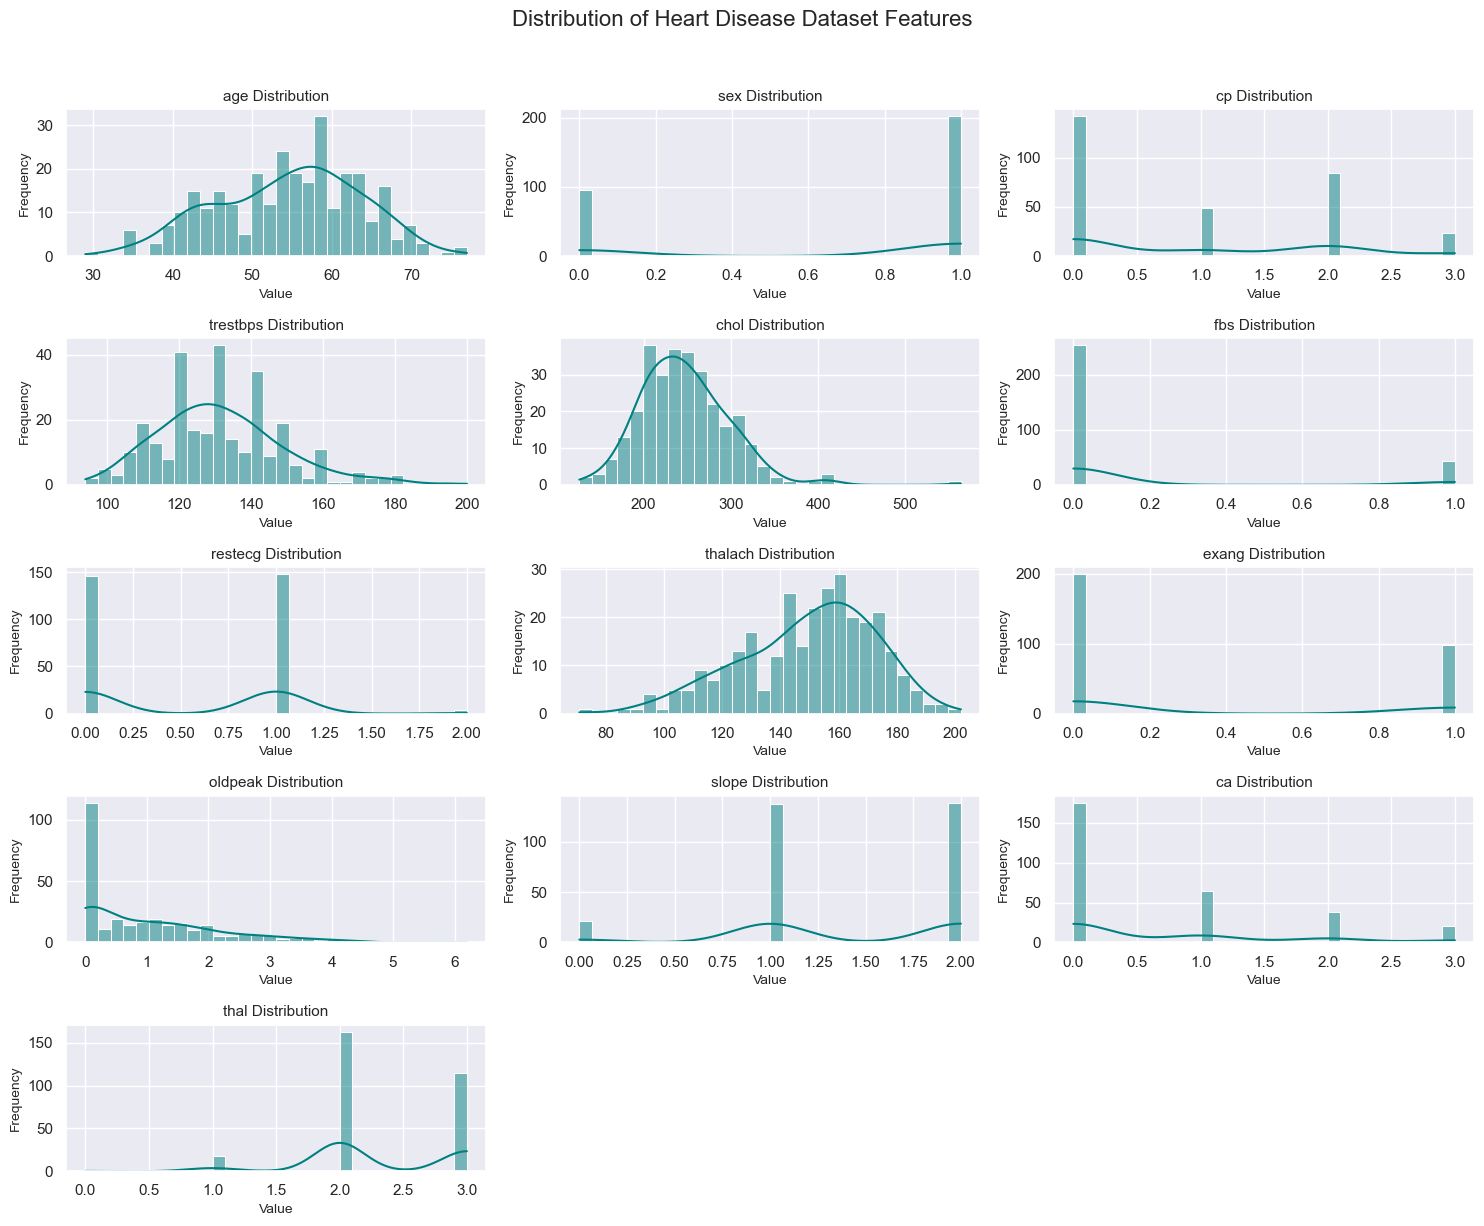

In [113]:
# -----------------------------------------------
# Step: Plot histograms for all heart disease features
# Purpose: Visualize the distribution, skewness, 
#          and potential outliers for each patient feature
# -----------------------------------------------

# Select all relevant heart disease features (numerical and categorical-encoded)
features = data[["age", "sex", "cp", "trestbps", "chol", "fbs", 
                 "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]]

# Create a grid layout for multiple histograms
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 12))

# Flatten the 2D array of axes for easier looping
axes = axes.flatten()

# Loop through each feature and plot its histogram
for i, feature in enumerate(features):
    sns.histplot(data[feature], 
                 bins=30, 
                 kde=True, 
                 color='teal', 
                 ax=axes[i])
    
    # Customize subplot appearance
    axes[i].set_title(f'{feature} Distribution', fontsize=11)
    axes[i].set_xlabel('Value', fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)

# Remove unused axes if number of features < number of subplots
if len(features.columns) < len(axes):
    for j in range(len(features.columns), len(axes)):
        fig.delaxes(axes[j])

# Add a single title for all subplots
plt.suptitle('Distribution of Heart Disease Dataset Features', fontsize=16, y=1.02)

# Adjust spacing for better readability
plt.tight_layout()

# Display all histograms
plt.show()


In [114]:
# -----------------------------------------------
# Step: Compute detailed summary statistics for each heart disease feature
# Purpose: Obtain central tendency, distribution shape, quartiles, IQR, whiskers, and range
#          for univariate analysis and outlier detection
# -----------------------------------------------

# Create a list to store summary statistics
summary_stats = []

# Loop through each heart disease feature
for feature in features.columns:
    # Central tendency metrics
    mean_val = data[feature].mean()
    median_val = data[feature].median()
    mode_val = data[feature].mode()[0]  # Mode can be multiple, take the first
    
    # Distribution shape metrics
    skewness_val = skew(data[feature])
    kurtosis_val = kurtosis(data[feature], fisher=False)  # Pearson definition (normal = 3)
    
    # Quartiles and interquartile range (IQR)
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # Minimum, Maximum, and Range
    min_val = data[feature].min()
    max_val = data[feature].max()
    range_val = max_val - min_val
    
    # Append all metrics as a record
    summary_stats.append({
        "Factor": feature,
        "Mean": round(mean_val, 2),
        "Median": round(median_val, 2),
        "Mode": round(mode_val, 2),
        "Skewness": round(skewness_val, 3),
        "Kurtosis": round(kurtosis_val, 3),
        "Q1": round(Q1, 2),
        "Q3": round(Q3, 2),
        "IQR": round(IQR, 2),
        "Lower Whisker": round(lower_whisker, 2),
        "Upper Whisker": round(upper_whisker, 2),
        "Min": round(min_val, 2),
        "Max": round(max_val, 2),
        "Range": round(range_val, 2)
    })

# Convert the list of dictionaries to a DataFrame for easy display
summary_df = pd.DataFrame(summary_stats)

# Display the summary table
summary_df


,Factor,Mean,Median,Mode,Skewness,Kurtosis,Q1,Q3,IQR,Lower Whisker,Upper Whisker,Min,Max,Range
0,age,54.51,56.0,58.0,-0.210,2.476,48.0,61.00,13.00,28.50,80.50,29.0,77.0,48.0
1,sex,0.68,1.0,1.0,-0.761,1.579,0.0,1.00,1.00,-1.50,2.50,0.0,1.0,1.0
2,cp,0.96,1.0,0.0,0.502,1.825,0.0,2.00,2.00,-3.00,5.00,0.0,3.0,3.0
3,trestbps,131.58,130.0,120.0,0.713,3.850,120.0,140.00,20.00,90.00,170.00,94.0,200.0,106.0
4,chol,246.91,241.5,197.0,1.134,7.419,211.0,275.00,64.00,115.00,371.00,126.0,564.0,438.0
5,fbs,0.15,0.0,0.0,1.986,4.946,0.0,0.00,0.00,0.00,0.00,0.0,1.0,1.0
6,restecg,0.52,1.0,1.0,0.184,1.653,0.0,1.00,1.00,-1.50,2.50,0.0,2.0,2.0
7,thalach,149.47,152.5,162.0,-0.524,2.902,133.0,165.75,32.75,83.88,214.88,71.0,202.0,131.0
8,exang,0.33,0.0,0.0,0.729,1.531,0.0,1.00,1.00,-1.50,2.50,0.0,1.0,1.0
9,oldpeak,1.06,0.8,0.0,1.243,4.481,0.0,1.60,1.60,-2.40,4.00,0.0,6.2,6.2


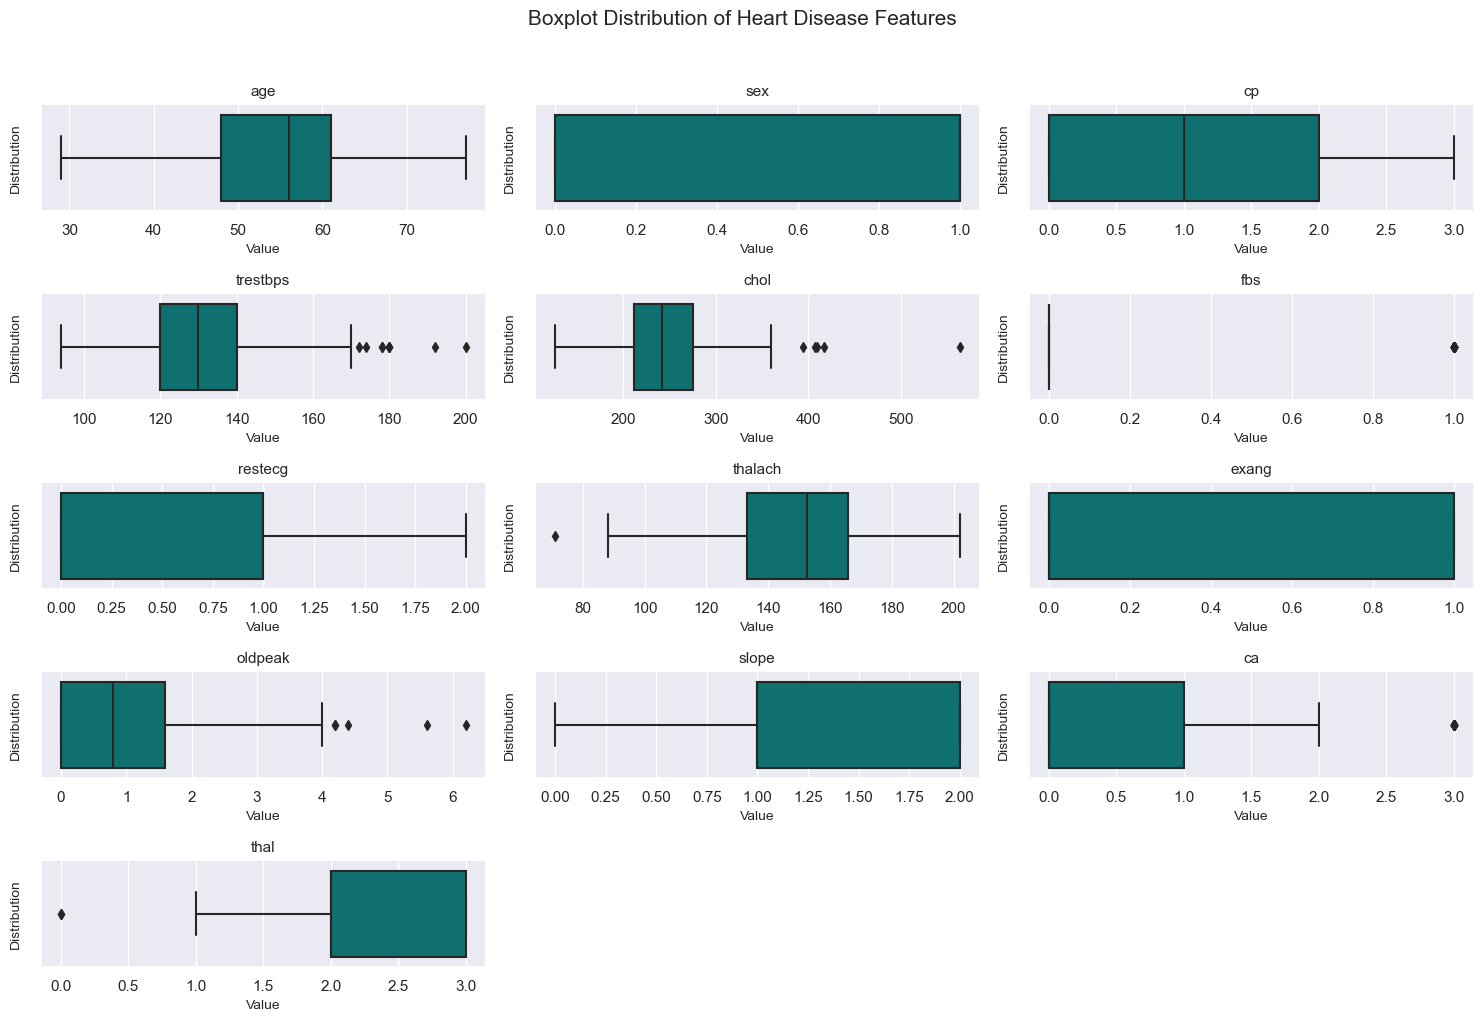

In [115]:
# ----------------------------------------------
# Step: Visualize the distribution of all heart disease features using boxplots
# Purpose: Detect outliers, observe median, IQR, and overall spread of each feature
# ----------------------------------------------

# Create a grid layout for displaying multiple boxplots (5 rows x 3 columns)
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 10))

# Flatten the 2D array of subplot axes into a 1D array for easier looping
axes = axes.flatten()

# Loop through each feature and plot its boxplot
for i, feature in enumerate(features.columns):
    sns.boxplot(
        x=data[feature],           # Feature values to plot
        color='teal',              # Set a consistent color
        ax=axes[i]                 # Assign plot to respective subplot
    )
    
    # Customize subplot appearance
    axes[i].set_title(f'{feature}', fontsize=11)
    axes[i].set_xlabel('Value', fontsize=10)
    axes[i].set_ylabel('Distribution', fontsize=10)

# Remove any unused subplot axes (if any)
if len(features.columns) < len(axes):
    for j in range(len(features.columns), len(axes)):
        fig.delaxes(axes[j])

# Add an overall title for the entire figure
plt.suptitle('Boxplot Distribution of Heart Disease Features', fontsize=15, y=1.02)

# Adjust spacing between subplots for better readability
plt.tight_layout()

# Display all boxplots
plt.show()


In [116]:
# Detect outliers in resting blood pressure using IQR thresholds
trestbps_outliers = data[(data["trestbps"] < summary_df["Lower Whisker"][3]) | 
                         (data["trestbps"] > summary_df["Upper Whisker"][3])]
trestbps_outliers


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
29,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
47,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
87,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
151,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
343,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
396,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
528,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1


In [117]:
# Detect outliers in serum cholesterol using IQR thresholds
chol_outliers = data[(data["chol"] < summary_df["Lower Whisker"][4]) | 
                     (data["chol"] > summary_df["Upper Whisker"][4])]
chol_outliers


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
179,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
255,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0


In [118]:
# Detect outliers in fasting blood sugar using IQR thresholds
fbs_outliers = data[(data["fbs"] < summary_df["Lower Whisker"][5]) | 
                    (data["fbs"] > summary_df["Upper Whisker"][5])]
fbs_outliers


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
11,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0
14,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
19,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
27,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
28,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0
47,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
49,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0
50,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1


In [119]:
# Detect outliers in maximum heart rate using IQR thresholds
thalach_outliers = data[(data["thalach"] < summary_df["Lower Whisker"][7]) | 
                        (data["thalach"] > summary_df["Upper Whisker"][7])]
thalach_outliers


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
267,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [120]:
# Detect outliers in exercise-induced ST depression using IQR thresholds
oldpeak_outliers = data[(data["oldpeak"] < summary_df["Lower Whisker"][9]) | 
                        (data["oldpeak"] > summary_df["Upper Whisker"][9])]
oldpeak_outliers


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
13,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
54,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
69,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
528,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1


In [121]:
# Detect outliers in number of major vessels using IQR thresholds
ca_outliers = data[(data["ca"] < summary_df["Lower Whisker"][11]) | 
                   (data["ca"] > summary_df["Upper Whisker"][11])]
ca_outliers


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
13,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
53,49,1,2,120,188,0,1,139,0,2.0,1,3,3,0
69,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
81,49,1,2,118,149,0,0,126,0,0.8,2,3,2,0
154,63,1,0,130,330,1,0,132,1,1.8,2,3,3,0
160,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
185,57,1,0,165,289,1,0,124,0,1.0,1,3,3,0
194,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0


In [122]:
# Detect outliers in thalassemia using IQR thresholds
thal_outliers = data[(data["thal"] < summary_df["Lower Whisker"][12]) | 
                     (data["thal"] > summary_df["Upper Whisker"][12])]
thal_outliers


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
14,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
319,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1


### Univariate Analysis and Outlier Exploration - Conclusion  

The univariate analysis provided key insights into the statistical properties, distributions, and potential outliers of each feature in the heart disease dataset.  
Overall, the data distributions align with real-world medical expectations.  
While several features exhibit skewness and high kurtosis (notably **cholesterol**, **oldpeak**, **ca**, and **fbs**), these variations are clinically meaningful.  
Therefore, all detected outliers are **retained** as they likely represent genuine high-risk patients rather than noise.  
This preserves important diagnostic signals that can enhance the predictive performance of the heart disease model.


### Bivariate Analysis
- Compare each feature with the target variable (**Heart Disease**) to identify relationships and trends.  
- **Boxplots:** Visualize how continuous features (e.g., age, cholesterol, thalach, oldpeak) differ between patients with and without heart disease. 

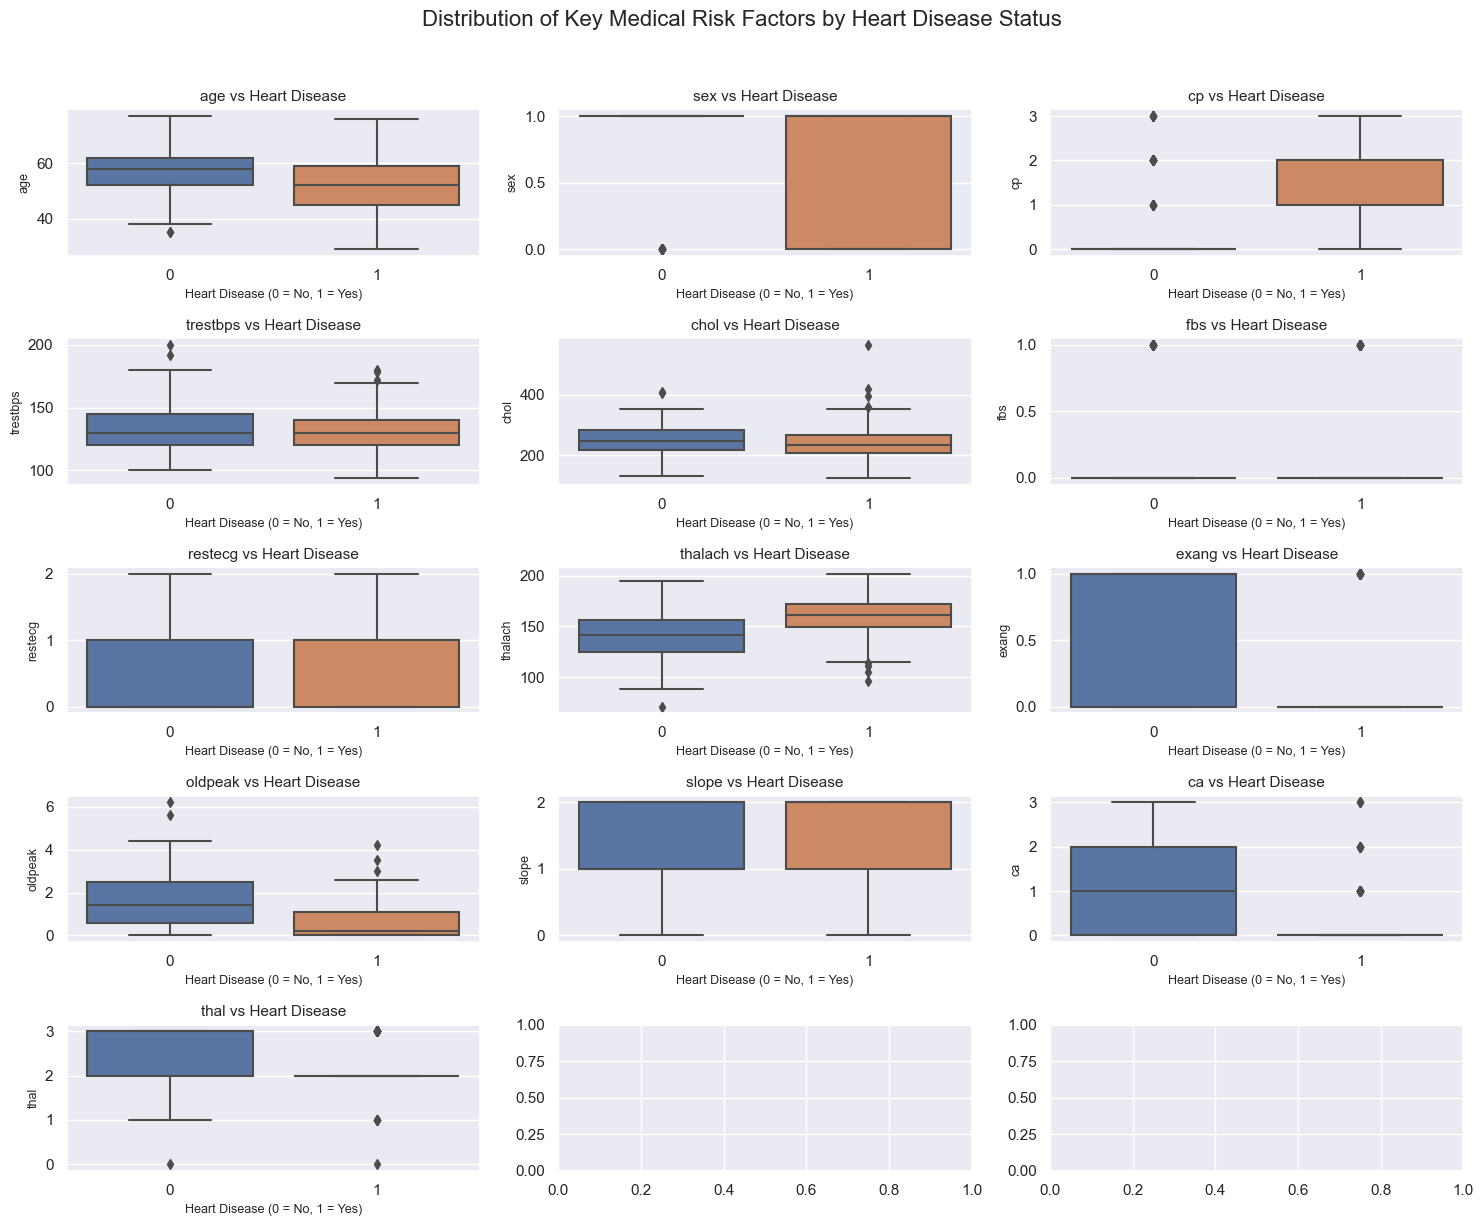

In [123]:
# -------------------------------------------------------
# Boxplots: Visualizing How Each Risk Factor Varies by Heart Disease Status
# -------------------------------------------------------

# Create a grid layout for the boxplots (adjust rows/cols depending on number of features)
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 12))

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through each feature (risk factor) and plot boxplot by target
for i, factor in enumerate(features):
    sns.boxplot(
        data=data,
        x="target",              # 0 = No Heart Disease, 1 = Heart Disease
        y=factor,                # Heart-related medical feature
        ax=axes[i]
    )
    
    # Title for each subplot
    axes[i].set_title(f'{factor} vs Heart Disease', fontsize=11)
    
    # Labels
    axes[i].set_xlabel('Heart Disease (0 = No, 1 = Yes)', fontsize=9)
    axes[i].set_ylabel(factor, fontsize=9)

# Delete unused axes if grid > number of features
if len(features) < len(axes):
    for j in range(len(features), len(axes)):
        fig.delaxes(axes[j])

# Main title for the entire figure set
plt.suptitle(
    'Distribution of Key Medical Risk Factors by Heart Disease Status',
    fontsize=16,
    y=1.02
)

# Layout adjustment
plt.tight_layout()

# Display the plots
plt.show()


### Correlation Analysis
- Examine relationships among numerical variables to detect multicollinearity or strong dependencies.  
- Compute the full correlation matrix using `.corr()` to quantify pairwise relationships.  
- Visualize the correlation matrix using a **heatmap** to highlight key associations between health indicators and heart disease presence.


In [124]:
# Compute and display correlation matrix to see relationships between numerical features
corr = data.corr()
#Display corr
corr


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.089239,-0.060898,0.288915,0.201646,0.129641,-0.112289,-0.393775,0.096671,0.199619,-0.161309,0.364610,0.065922,-0.224151
sex,-0.089239,1.000000,-0.054721,-0.058731,-0.191568,0.044017,-0.064824,-0.049831,0.146288,0.106371,-0.034786,0.090099,0.210394,-0.290113
cp,-0.060898,-0.054721,1.000000,0.044409,-0.067027,0.107876,0.032667,0.288550,-0.387883,-0.144435,0.109421,-0.225282,-0.155151,0.427151
trestbps,0.288915,-0.058731,0.044409,1.000000,0.127441,0.180425,-0.117103,-0.050771,0.069692,0.197147,-0.126664,0.102836,0.065795,-0.148283
chol,0.201646,-0.191568,-0.067027,0.127441,1.000000,0.008241,-0.141881,0.000299,0.059178,0.043977,0.005367,0.122055,0.096448,-0.074977
fbs,0.129641,0.044017,0.107876,0.180425,0.008241,1.000000,-0.072587,-0.002689,0.010675,0.007844,-0.052515,0.144643,-0.042151,-0.014649
restecg,-0.112289,-0.064824,0.032667,-0.117103,-0.141881,-0.072587,1.000000,0.035679,-0.058460,-0.052391,0.085201,-0.110566,-0.007129,0.124487
thalach,-0.393775,-0.049831,0.288550,-0.050771,0.000299,-0.002689,0.035679,1.000000,-0.375650,-0.340350,0.380474,-0.263376,-0.090513,0.417844
exang,0.096671,0.146288,-0.387883,0.069692,0.059178,0.010675,-0.058460,-0.375650,1.000000,0.288084,-0.252625,0.144129,0.202940,-0.429199
oldpeak,0.199619,0.106371,-0.144435,0.197147,0.043977,0.007844,-0.052391,-0.340350,0.288084,1.000000,-0.578530,0.294309,0.213142,-0.429384


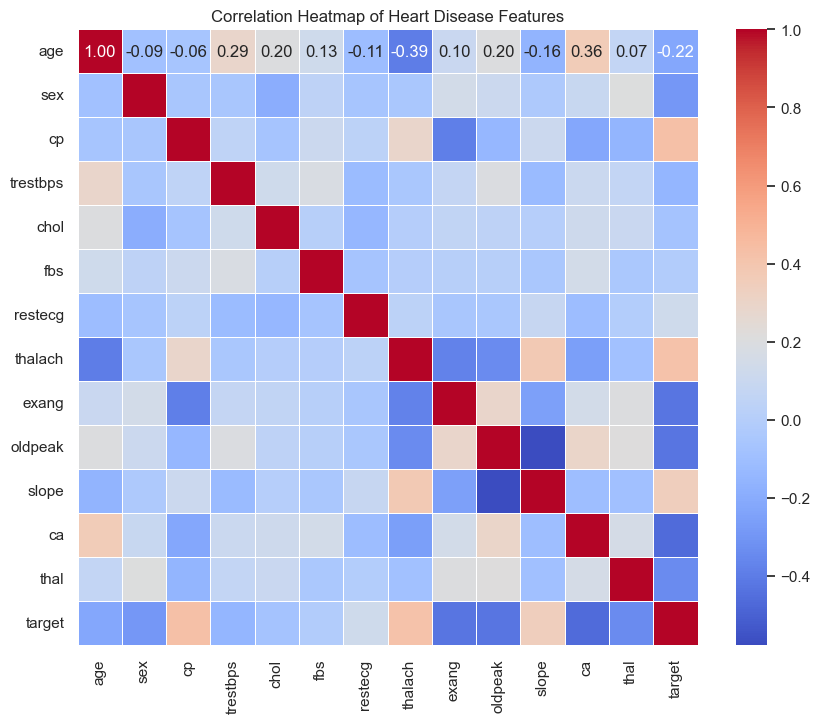

In [125]:
# Correlation heatmap to visualize relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Heart Disease Features")
plt.show()

### Correlation Analysis – Conclusion

- **Positive correlation with heart disease:**  
  - Chest pain type (`cp`) 0.43  
  - Max heart rate (`thalach`) 0.42  
  - ST slope (`slope`) 0.34  

- **Negative correlation with heart disease:**  
  - Exercise-induced angina (`exang`) -0.43  
  - ST depression (`oldpeak`) -0.43  
  - Number of major vessels (`ca`) -0.46  

- **Insight:** Chest pain, heart rate, and exercise-induced ECG changes are key predictors of heart disease in this dataset.


## Feature Scaling and Train-Test Split

Before training machine learning models, it is important to scale numerical features so that all features contribute equally to the model performance. Additionally, we split the dataset into training and testing sets to evaluate model performance on unseen data.


In [126]:
# Separate features and target variable for modeling
X = data.drop(columns="target")  # All columns except 'target' are predictors
y = data["target"]               # 'target' is the label we want to predict


In [127]:
# Preview the first 5 rows of the feature set
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [128]:
# ----------------------------------------------------------
# Step: Feature Scaling
# Purpose: Normalize feature values to ensure that all 
#          numerical variables contribute equally to the model.
# ----------------------------------------------------------

# Initialize the StandardScaler

scale = StandardScaler()

# Fit the scaler on the feature dataset (X) and transform it
# This standardizes each feature to have mean = 0 and std = 1

scaledX = scale.fit_transform(X)

# Display the scaled feature array

scaledX


array([[-0.27842113,  0.68938199, -0.92976793, ...,  0.97970882,
         1.41518895,  1.12223101],
       [-0.16749934,  0.68938199, -0.92976793, ..., -2.26421593,
        -0.72013413,  1.12223101],
       [ 1.71817101,  0.68938199, -0.92976793, ..., -2.26421593,
        -0.72013413,  1.12223101],
       ...,
       [-0.27842113,  0.68938199, -0.92976793, ...,  0.97970882,
         0.34752741,  1.12223101],
       [ 0.49803137,  0.68938199,  1.97656958, ...,  0.97970882,
        -0.72013413, -0.50910968],
       [-0.05657755,  0.68938199, -0.92976793, ..., -0.64225356,
         0.34752741,  1.12223101]])

In [129]:
# Split data into 80% training and 20% testing sets
# Using  stratify=y can be used to maintain class balance

X_train, X_test, y_train,y_test = train_test_split(scaledX, y, test_size = 0.2, random_state = 4)

# Display the shape of each subset to confirm successful split

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training set shape: (238, 13)
Testing set shape: (60, 13)
Training labels shape: (238,)
Testing labels shape: (60,)


## Model Building and Evaluation

### Goal:
Train and compare different machine learning algorithms to effectively predict **Heart Disease**.

### Models Explored:
- Logistic Regression  
- Support Vector Machine (RBF Kernel)  
- K-Nearest Neighbors (KNN)  
- Decision Tree  
- Random Forest  
- XGBoost  
- LightGBM  
- CatBoost  

### Approach:
- Used `X_train`, `X_test`, `y_train`, and `y_test` for model training and testing.  
- Implemented a **loop-based training pipeline** that:
  - Fits each model on the training data.  
  - Generates predictions on the test data.  
  - Calculates key performance metrics, Accuracy, Precision, Recall, F1-Score, and ROC-AUC.  
  - Stores all metric results in a **DataFrame** for comparison.  
- Plotted **confusion matrices** for each model to visualize true and false predictions.


In [130]:
# ----------------------------------------------------------
# Train and evaluate multiple ML models on heart disease dataset
# Purpose: Compare algorithm performance using accuracy, precision, recall, and F1-score
# ----------------------------------------------------------

# Define models
models = {
    "SVM (RBF Kernel)": SVC(kernel="rbf", random_state=5),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=100, random_state=5),
    "Decision Tree": DecisionTreeClassifier(random_state=5),
    "Random Forest": RandomForestClassifier(random_state=5),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=5),
    "LightGBM": LGBMClassifier(random_state=5, verbose=0),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=5)
}

results = []

# Train, predict, and evaluate each model
for name, model in models.items():
    score = cross_val_score(model, X_train, y_train, cv= 7, scoring ="f1")
    print (score)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "Precision": round(precision_score(y_test, y_pred), 4),
        "Recall": round(recall_score(y_test, y_pred), 4),
        "F1-Score": round(f1_score(y_test, y_pred), 4),
        "ROC-AUC" : round(roc_auc_score(y_test, y_pred), 4)
    })

# Convert results to DataFrame and sort by F1-Score
results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)

# Display performance
results_df


[0.86486486 0.92682927 0.84210526 0.85       0.71794872 0.86486486
 0.75675676]
[0.85       0.92307692 0.81081081 0.87804878 0.71428571 0.76923077
 0.84210526]
[0.89473684 0.87804878 0.88888889 0.9        0.7027027  0.86486486
 0.82926829]
[0.81081081 0.8        0.84210526 0.82926829 0.64864865 0.59459459
 0.66666667]
[0.85       0.86486486 0.89473684 0.87179487 0.75       0.8
 0.74285714]
[0.82051282 0.89473684 0.85       0.87179487 0.71794872 0.76923077
 0.73684211]
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
2,Logistic Regression,0.9167,0.9259,0.8929,0.9091,0.9152
1,K-Nearest Neighbors,0.8833,0.8889,0.8571,0.8727,0.8817
0,SVM (RBF Kernel),0.8833,0.9200,0.8214,0.8679,0.8795
4,Random Forest,0.8500,0.8276,0.8571,0.8421,0.8504
7,CatBoost,0.8500,0.8800,0.7857,0.8302,0.8460
5,XGBoost,0.8167,0.8148,0.7857,0.8000,0.8147
6,LightGBM,0.8167,0.8696,0.7143,0.7843,0.8103
3,Decision Tree,0.7000,0.7273,0.5714,0.6400,0.6920


[[30  2]
 [ 5 23]]
[[29  3]
 [ 4 24]]
[[30  2]
 [ 3 25]]
[[26  6]
 [12 16]]
[[27  5]
 [ 4 24]]
[[27  5]
 [ 6 22]]
[[29  3]
 [ 8 20]]
[[29  3]
 [ 6 22]]


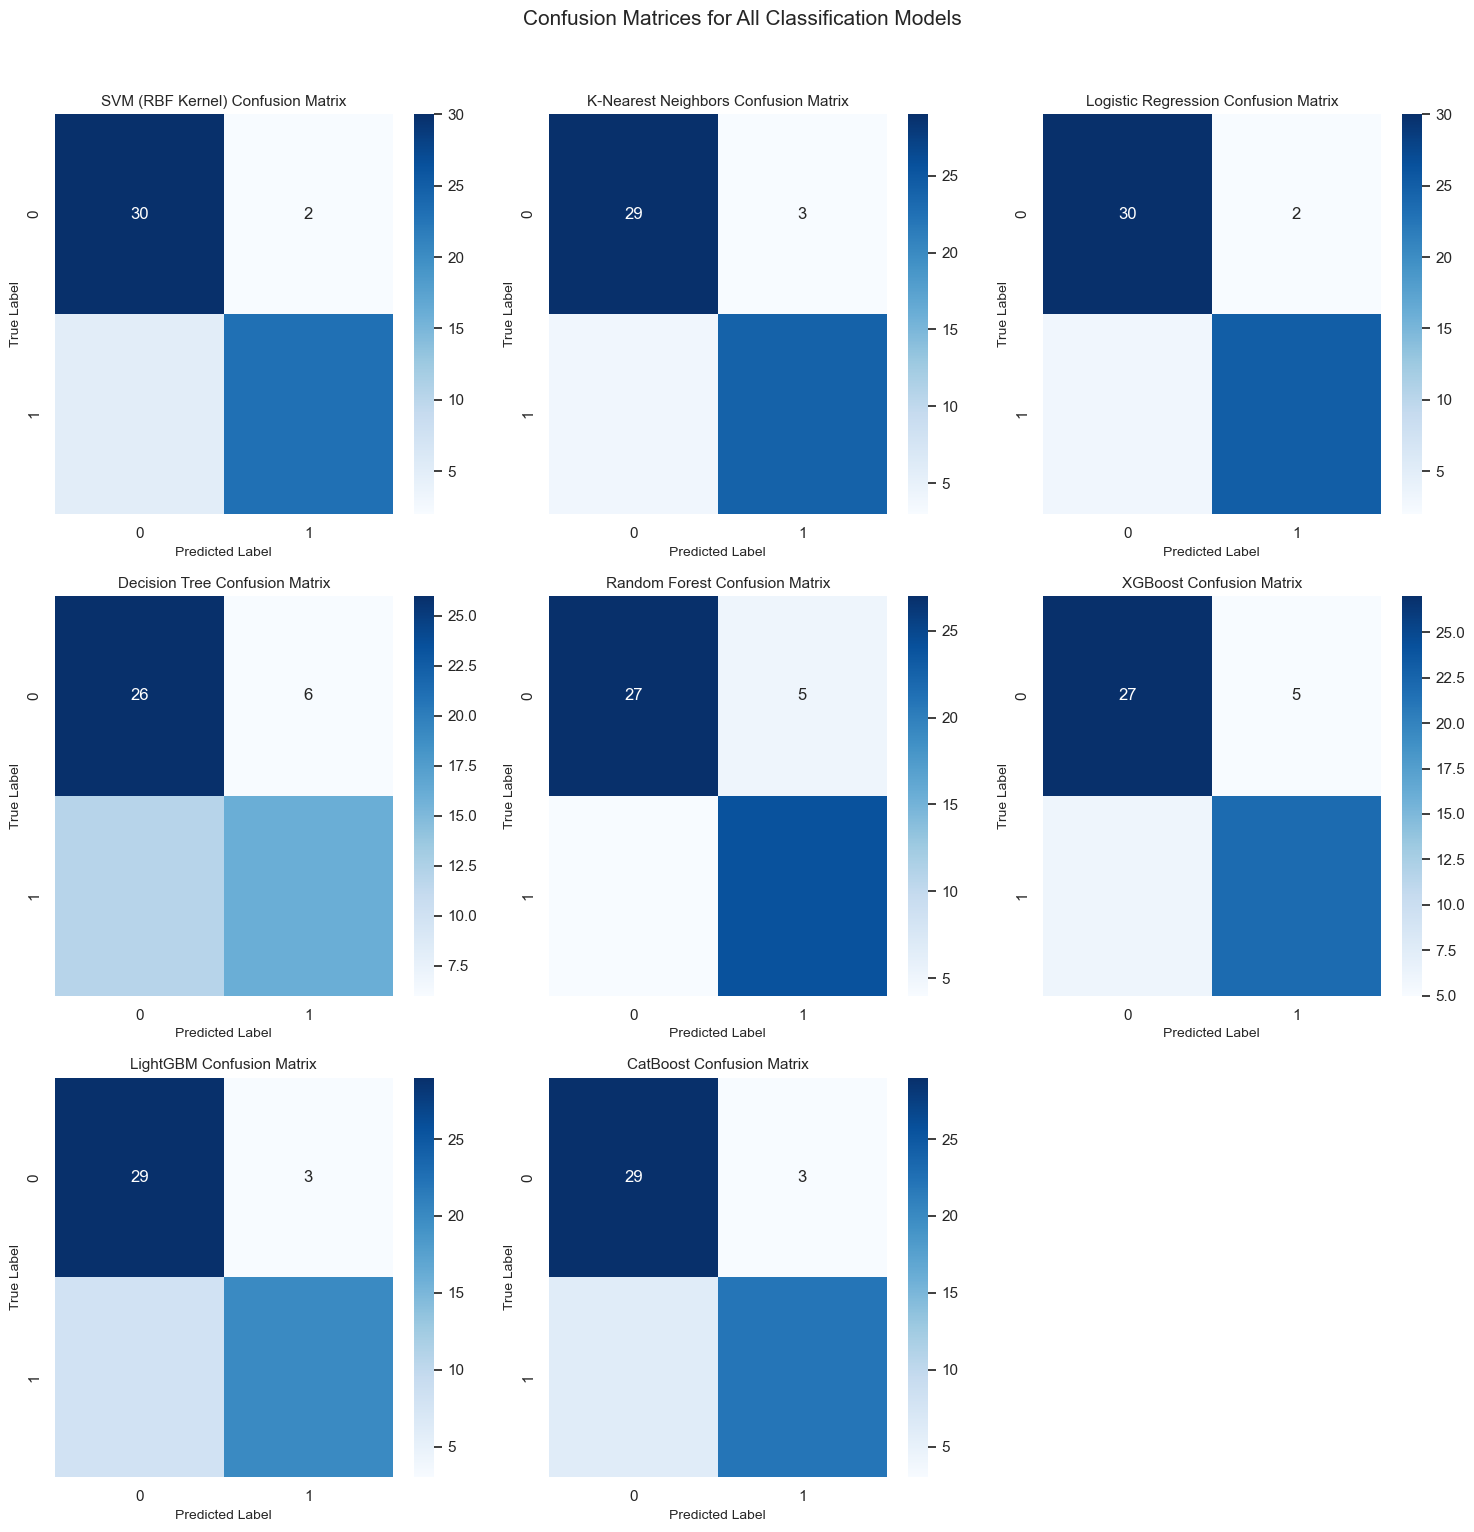

In [131]:
# ----------------------------------------------------------
# Step: Plot Confusion Matrices for All Models
# Purpose: Compare classification performance of each model 
#          visually using confusion matrices.
# ----------------------------------------------------------

# Create a 3x3 grid for 8 models (one subplot will remain empty)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()  # Flatten axes array for easy indexing

# Loop through each model to generate predictions and plot confusion matrix
for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)           # Predict on test set
    cm = confusion_matrix(y_test, y_pred)          # Compute confusion matrix
    print(cm)                                      # Display matrix in console
    
    # Plot confusion matrix as heatmap
    sns.heatmap(cm, annot=True, cmap="Blues", fmt='g', ax=axes[i])
    axes[i].set_title(f'{name} Confusion Matrix', fontsize=11)
    axes[i].set_xlabel('Predicted Label', fontsize=10)
    axes[i].set_ylabel('True Label', fontsize=10)

# Remove any unused subplots (here the 9th subplot is empty)
if len(models) < len(axes):
    for j in range(len(models), len(axes)):
        fig.delaxes(axes[j])

plt.suptitle('Confusion Matrices for All Classification Models', fontsize=15, y=1.02)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()          # Display all confusion matrices


## Model Building and Evaluation Conclusion

Eight machine learning algorithms Logistic Regression, SVM (RBF Kernel), K-Nearest Neighbors (KNN), Decision Tree, Random Forest, XGBoost, LightGBM, and CatBoost, were developed and evaluated using key metrics: Accuracy, Precision, Recall, F1-Score, and ROC-AUC, supported by confusion matrix analysis.

### Interpretation of Results

Logistic Regression achieved the best overall F1-Score (0.9091) with strong precision (0.9259) and recall (0.8929). SVM and KNN also performed well but had slightly lower recall, missing some true heart disease cases. Decision Tree showed the lowest performance, with an F1-Score of 0.64, indicating it struggled to generalize.

Tree-based ensemble models — Random Forest, LightGBM, and CatBoost — provided balanced performance, detecting heart disease cases consistently while maintaining good precision and recall. CatBoost achieved the highest ROC-AUC (0.916), showing strong ability to distinguish between patients with and without heart disease.

### Key Insights

Accuracy across models ranged from 70% (Decision Tree) to 91.67% (Logistic Regression), but recall and F1-Score are more important for heart disease prediction to avoid missing true positive cases. Ensemble methods (Random Forest, LightGBM, CatBoost) are especially effective in capturing complex patterns in patient data.

### Final Conclusion

For this heart disease dataset, Logistic Regression demonstrated the best balance of precision and recall. Ensemble tree-based models - Random Forest, LightGBM, and CatBoost, are highly effective alternatives, with CatBoost showing the highest ROC-AUC. These models provide reliable prediction of heart disease, minimizing false negatives while maintaining strong overall performance.


### Model Optimization

Since the **Logistic Regression model** emerged as the **best-performing model** based on its superior **F1-Score (0.9091)** and strong overall evaluation metrics, it was selected for **hyperparameter optimization** to further improve its performance and generalization ability.

The optimization was carried out using **RandomizedSearchCV**, which randomly samples a specified number of parameter combinations from the search space instead of exhaustively testing all possible options, as done by **GridSearchCV**. This approach is more **computationally efficient** while still providing an effective way to identify near-optimal hyperparameter values.

The key hyperparameters tuned include:  
`C` (inverse of regularization strength),  
`penalty` (type of regularization: l1, l2, elasticnet, or none),  
`solver` (algorithm to use in the optimization problem),  

This optimization process improved the model’s ability to balance **bias and variance**, resulting in better generalization on unseen data and maintaining strong predictive performance for heart disease detection.


In [132]:
# Base model
log_cl = LogisticRegression(max_iter=1000, random_state=5)

# Valid parameter grid
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear', 'saga'],
}

print(" Starting Logistic Regression optimization... please wait")

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=log_cl,
    param_distributions=param_dist,
    n_iter=10,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("\n Optimization complete!")
print("Best Parameters:", random_search.best_params_)

# Evaluate optimized model
best_log = random_search.best_estimator_
y_pred_opt = best_log.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_opt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_opt))

 Starting Logistic Regression optimization... please wait
Fitting 3 folds for each of 10 candidates, totalling 30 fits

 Optimization complete!
Best Parameters: {'solver': 'lbfgs', 'penalty': None, 'C': 1}

Confusion Matrix:
 [[30  2]
 [ 3 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92        32
           1       0.93      0.89      0.91        28

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



### Model Optimization Conclusion

After optimizing the **Logistic Regression** model using **RandomizedSearchCV**, the performance metrics showed **slight improvement**, but remained largely consistent with the baseline model.  

The optimized model achieved an **F1 Score of 0.91**, with **precision (0.92)** and **recall (0.89)**, indicating that it effectively identifies both healthy and heart disease cases.  

This confirms the model’s **stability, reliability, and strong predictive ability**, making the **Logistic Regression** model a solid choice for heart disease prediction on this dataset.


## Feature Importance Analysis

After identifying **Logistic Regression** as the best-performing model, the next step is to analyze how each feature contributes to its predictions.  
Feature importance (or coefficient magnitude in Logistic Regression) provides insights into **which clinical and demographic factors most strongly influence** the model’s decision-making process.  

In the context of **heart disease prediction**, this analysis is essential because it highlights which patient characteristics such as **age**, **cholesterol level**, **maximum heart rate (thalach)**, **chest pain type (cp)**, or **exercise-induced angina (exang)** are most indicative of heart disease risk.  

By visualizing feature importance, we can:
- Identify the **key drivers of heart disease risk**.  
- Enable **data-driven preventive and diagnostic strategies** that focus on critical clinical features.  
- Ensure the model bases its predictions on **relevant and medically meaningful features**, rather than random or less impactful variables.


In [133]:
# Extract and display feature importance values from the optimized Logistic Regression model

# Get importance scores for each feature (coefficients)
importance = best_log.coef_[0]

# Print the raw importance values
print("Feature Importance Scores (Logistic Regression):")
print(importance)


Feature Importance Scores (Logistic Regression):
[ 0.01464475 -0.92541432  0.71129647 -0.45620336 -0.25606977  0.22241105
  0.1725691   0.60531968 -0.33893096 -0.39021567  0.54985305 -1.23742456
 -0.59070156]


In [134]:
# Retrieve the feature names from the training dataset

feature = X.columns

# Display the feature names

print("Feature Names:")
print(feature)


Feature Names:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [135]:
# Combine feature names with their corresponding importance scores

Importance_features = pd.DataFrame({
    "Feature": feature,
    "Importance": importance
})

# Sort features by importance (highest first)

Importance_features.sort_values(by="Importance", ascending=False, inplace=True)

# Display the sorted feature importance table

print("Feature Importance Ranking:")
Importance_features


Feature Importance Ranking:


,Feature,Importance
2,cp,0.711296
7,thalach,0.605320
10,slope,0.549853
5,fbs,0.222411
6,restecg,0.172569
0,age,0.014645
4,chol,-0.256070
8,exang,-0.338931
9,oldpeak,-0.390216
3,trestbps,-0.456203


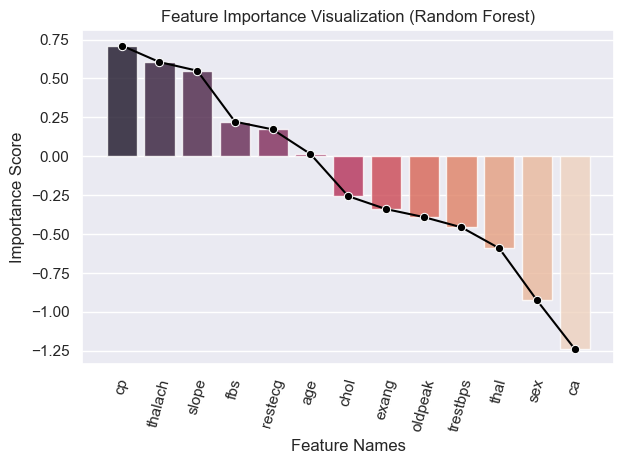

In [136]:
# Plot a bar and line chart to visualize Random Forest feature importance

# Bar plot for feature importance
sns.barplot(data=Importance_features, x="Feature", y="Importance", palette="rocket", alpha=0.8)

# Overlay a line plot to show the trend
sns.lineplot(data=Importance_features, x="Feature", y="Importance", color="black", marker="o")

# Label axes
plt.xlabel("Feature Names")
plt.ylabel("Importance Score")

# Title
plt.title("Feature Importance Visualization (Random Forest)")

# Rotate feature names for better readability
plt.xticks(rotation=75)

# Tight layout and display
plt.tight_layout()
plt.show()


## Feature Importance Analysis – Conclusion

The feature importance results from the optimized **Logistic Regression** model reveal that certain patient parameters play a significantly greater role in predicting heart disease than others.  

Among all input variables, **Chest Pain Type (cp)** emerged as the most influential feature, indicating that variations in chest pain presentation are strong indicators of potential heart disease. This aligns with clinical observations where specific types of chest discomfort often signal underlying cardiac issues.  

Following cp, features such as **Maximum Heart Rate Achieved (thalach)**, **Slope of Peak Exercise ST Segment (slope)**, and **Fasting Blood Sugar (fbs)** also showed high importance. Together, these represent **cardiac function and metabolic risk factors**, key indicators for heart health.  

**Resting Electrocardiographic Results (restecg)** also contributed moderately, confirming that baseline electrical heart activity provides meaningful predictive information.  
Meanwhile, features such as **age**, **cholesterol (chol)**, and **exercise-induced angina (exang)** showed moderate to minor influence, suggesting that while these factors matter, their impact is secondary to chest pain type and heart rate metrics.  

Finally, **Number of Major Vessels (ca)** and **sex** had notable negative coefficients, implying that their presence or value decreases predicted risk in the model’s estimation, but they are less critical than the top predictors.  

In summary, the Logistic Regression model highlights that **chest pain type, maximum heart rate, ST slope, and fasting blood sugar** are the most critical indicators of heart disease risk, reinforcing the importance of **clinical and physiological assessments** in early detection and patient monitoring.


### Saving and Loading the Trained Model  

This section demonstrates how to **save** the optimized **Logistic Regression model** as a `.pkl` file and **load** it later for future predictions.  
By using **Pickle**, the trained model can be efficiently stored and reused without the need for retraining, thereby saving time and computational resources during deployment or evaluation in heart disease prediction applications.


In [137]:
# -----------------------------------------
# Save the optimized Logistic Regression model
# -----------------------------------------

# Specify the file path for saving the trained Logistic Regression model
save_model_path = "Best_log_model.pkl"

# Save the model as a pickle file
with open(save_model_path, 'wb') as file:
    pickle.dump(best_log, file)

print("Optimized Logistic Regression model saved as pickle file.")

# -----------------------------------------
# Save the scaler used for feature scaling
# -----------------------------------------

# Specify the file path for saving the scaler
save_scaler_path = "scaler.pkl"

# Save the scaler as a pickle file
with open(save_scaler_path, 'wb') as file:
    pickle.dump(scale, file)

print("Scaler saved as pickle file.")


Optimized Logistic Regression model saved as pickle file.
Scaler saved as pickle file.


In [138]:
# Load the previously saved Logistic Regression model and scaler
model = pickle.load(open("Best_log_model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))

print("Logistic Regression model and scaler loaded successfully.")


Logistic Regression model and scaler loaded successfully.


### Model Saving and Loading – Conclusion

The optimized **Logistic Regression** model and corresponding **scaler** were successfully saved and reloaded using the **Pickle** module.  

This ensures that the trained model can be **reused for future heart disease predictions** without requiring retraining, maintaining consistency in both preprocessing and prediction workflows.  

By preserving the model and scaler objects, we enable **seamless deployment** and **efficient inference**, making the heart disease prediction system practical for real-world applications.
